### 1. Importing Libraries and dataframe

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing dataframe

path = r'/Users/matthewabrams/Desktop/Movie Analysis'
movies = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'movies.csv'), index_col = False)
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# Getting columns of dataframe

movies.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [4]:
# Getting data type of each column

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### 2. Splitting, renaming, and removing columns 

In [5]:
# Splitting release column into two columns: released date and country since we want to do a spatial and time series analysis 

movies[['released date', 'country']] = movies['released'].str.split('(', expand = True)

In [6]:
# Returning all string characters of values under country column except for last character ')' from each row 
# The country column now represents the location for release of film rather than origin.

movies['country'] = movies['country'].str[:-1]

In [7]:
# Removing released column (original column)

movies.drop(columns = ['released'], inplace = True)

In [8]:
# Renaming columns from score to IMDb score and from runtime to duration(in min)

movies.rename(columns = {'score': 'IMDb score', 'runtime':'duration (in min)'}, inplace = True)

### 3. Changing Data Types

In [9]:
# Changing data type of released date from object to date time

movies['released date'] = pd.to_datetime(movies['released date'])

In [10]:
# Checking

movies.dtypes

name                         object
rating                       object
genre                        object
year                          int64
IMDb score                  float64
votes                       float64
director                     object
writer                       object
star                         object
country                      object
budget                      float64
gross                       float64
company                      object
duration (in min)           float64
released date        datetime64[ns]
dtype: object

### 4. Checking For Null Values

In [11]:
# Returning the number of empty values per column

movies.isnull().sum()

name                    0
rating                 77
genre                   0
year                    0
IMDb score              3
votes                   3
director                0
writer                  3
star                    1
country                 2
budget               2171
gross                 189
company                17
duration (in min)       4
released date           2
dtype: int64

In [12]:
# Returning the percentage of empty values per column

(movies.isnull().sum() / len(movies)).round(4)

name                 0.0000
rating               0.0100
genre                0.0000
year                 0.0000
IMDb score           0.0004
votes                0.0004
director             0.0000
writer               0.0004
star                 0.0001
country              0.0003
budget               0.2831
gross                0.0246
company              0.0022
duration (in min)    0.0005
released date        0.0003
dtype: float64

In [13]:
# Statistical description of budget column

movies['budget'].describe()

count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

<AxesSubplot:ylabel='Frequency'>

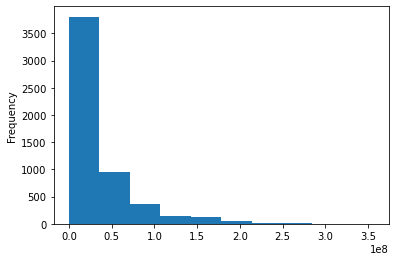

In [14]:
# Histogram of values regarding budget column, distribution is skewed (right)

movies['budget'].plot.hist()

In [15]:
movies['budget'].median()

20500000.0

In [16]:
# Imputing null values with median

movies['budget'].fillna(movies['budget'].median(), inplace = True)

In [17]:
movies['budget'].describe()

count    7.668000e+03
mean     3.131756e+07
std      3.575273e+07
min      3.000000e+03
25%      1.400000e+07
50%      2.050000e+07
75%      3.200000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [18]:
# Statistical description of gross column

movies['gross'].describe()

count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
25%      4.532056e+06
50%      2.020576e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64

<AxesSubplot:ylabel='Frequency'>

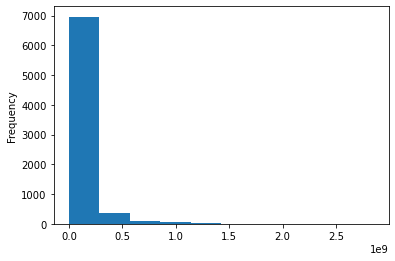

In [19]:
# Histogram of values regarding gross column, distribution is skewed (right)

movies['gross'].plot.hist()

In [20]:
# Median value of gross values

movies['gross'].median()

20205757.0

In [21]:
# Imputing null values with median

movies['gross'].fillna(movies['gross'].median(), inplace = True)

In [22]:
# Statistical description of runtime column

movies['duration (in min)'].describe()

count    7664.000000
mean      107.261613
std        18.581247
min        55.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: duration (in min), dtype: float64

<AxesSubplot:ylabel='Frequency'>

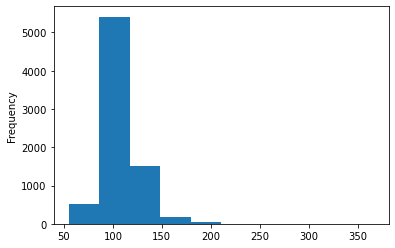

In [23]:
# Histogram of values regarding runtime column, distribution is skewed (right)

movies['duration (in min)'].plot.hist()

In [24]:
# Median value of gross values

movies['duration (in min)'].median()

104.0

In [25]:
# Imputing null values with median

movies['duration (in min)'].fillna(movies['duration (in min)'].median(), inplace = True)

In [26]:
# Statistical description of votes column

movies['IMDb score'].describe()

count    7665.000000
mean        6.390411
std         0.968842
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: IMDb score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

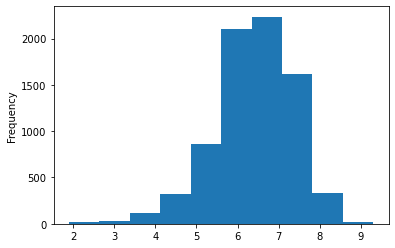

In [27]:
# Histogram of values regarding score column, distribution is nearly symmetrical

movies['IMDb score'].plot.hist()

In [28]:
# Imputing null values with mean 

movies['IMDb score'].fillna(6.4, inplace = True)

In [29]:
# Statistical description of votes column

movies['votes'].describe()

count    7.665000e+03
mean     8.810850e+04
std      1.633238e+05
min      7.000000e+00
25%      9.100000e+03
50%      3.300000e+04
75%      9.300000e+04
max      2.400000e+06
Name: votes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

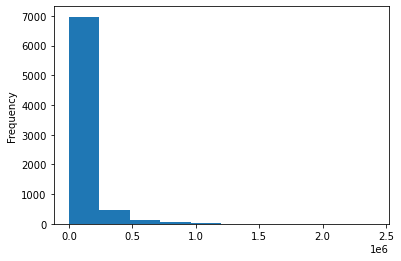

In [30]:
# Histogram of values regarding score column, distribution is skewed (right)

movies['votes'].plot.hist()

In [31]:
# Median value of votes values

movies['votes'].median()

33000.0

In [32]:
# Imputing null values with median

movies['votes'].fillna(movies['votes'].median(), inplace = True)

In [33]:
# Creating flag columns for original categorical columns with null values 
# We don't want to impute values because the values there are strings
# We also don't want to delete the Nan values since we want to include the observations in our analysis

movies_clean = movies
movies_clean['unknown rating'] = movies['rating'].isnull() == True
movies_clean['unknown writer'] = movies['writer'].isnull() == True
movies_clean['unknown star'] = movies['star'].isnull() == True
movies_clean['unknown country'] = movies['country'].isnull() == True
movies_clean['unknown company'] = movies['company'].isnull() == True
movies_clean['unknown released date'] = movies['released date'].isnull() == True


In [34]:
# After addressing null values, checking for sum of empty values for each column
movies_clean.isnull().sum()

name                      0
rating                   77
genre                     0
year                      0
IMDb score                0
votes                     0
director                  0
writer                    3
star                      1
country                   2
budget                    0
gross                     0
company                  17
duration (in min)         0
released date             2
unknown rating            0
unknown writer            0
unknown star              0
unknown country           0
unknown company           0
unknown released date     0
dtype: int64

### 5. Checking for inconsistant format

In [35]:
# Returning unique values of rating column

movies_clean['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [36]:
# Returning unique values of country column

movies_clean['country'].unique()

array(['United States', 'Australia', 'Japan', 'Ireland', 'Argentina',
       'Soviet Union', 'United Kingdom', 'Sweden', 'France', 'Canada',
       'Brazil', 'South Korea', 'West Germany', 'Italy', 'Denmark',
       'Netherlands', 'Uruguay', 'Hong Kong', 'Taiwan', 'Yugoslavia',
       'Spain', 'Finland', 'South Africa', 'Philippines', 'Portugal',
       'Mexico', 'Germany', 'New Zealand', 'Iran', 'Greece', 'Singapore',
       'Poland', 'India', 'Federal Republic of Yugoslavia', 'Iceland',
       'Belgium', 'Israel', 'Hungary', 'China', 'Russia', 'Norway',
       'Austria', 'Thailand', 'Puerto Rico', 'Turkey', 'Romania',
       'Czech Republic', 'Latvia', 'Indonesia', 'Bahrain', 'Kazakhstan',
       nan, 'Malaysia', 'Croatia', 'Bulgaria', 'Lebanon',
       'United Arab Emirates', 'Ukraine', 'Bahamas', 'Kuwait', 'Vietnam',
       'Cameroon'], dtype=object)

In [37]:
# Renaming country names with more current names, will be of use for spatial analysis later

movies['country'].replace({'Soviet Union':'Russia', 'West Germany':'Germany', 
                                               'Hong Kong':'China', 'Palestine':'Israel', 'Federal Republic of Yugoslavia':'Serbia',
                                               'Yugoslavia':'Serbia', 'Bahamas':'The Bahamas'}, inplace = True)

In [38]:
# Returning unique values of company column, doesn't show all companies

movies_clean['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Dow Jazz Films', 'Embi Productions', 'PK 65 Films'], dtype=object)

In [39]:
# Returning unique values of genre column

movies_clean['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [40]:
# Returning unique values of company column doesn't show all writers

movies_clean['writer'].unique()

array(['Stephen King', 'Henry De Vere Stacpoole', 'Leigh Brackett', ...,
       'Lynno Lovert', 'James Randall', 'Pereko Mosia'], dtype=object)

In [41]:
# Returning unique values of company column doesn't show all directors

movies_clean['director'].unique()

array(['Stanley Kubrick', 'Randal Kleiser', 'Irvin Kershner', ...,
       'Nkanya Nkwai', 'James Randall', 'Pereko Mosia'], dtype=object)

In [42]:
# Returning unique values of company column doesn't show all stars

movies_clean['star'].unique()

array(['Jack Nicholson', 'Brooke Shields', 'Mark Hamill', ...,
       'Onyama Laura', 'Christina Roz', 'Siyabonga Mabaso'], dtype=object)

In [43]:
# Making sure the values for each column have no white space and the name for each value are properly cased so formatting is consistent

movies_clean['director'] = movies_clean['director'].str.strip().str.title()
movies_clean['writer'] = movies_clean['writer'].str.strip().str.title()
movies_clean['star'] = movies_clean['star'].str.strip().str.title()
movies_clean['country'] = movies_clean['country'].str.strip().str.title()
movies_clean['genre'] = movies_clean['genre'].str.strip().str.title()
movies_clean['company'] = movies_clean['company'].str.strip().str.title()

### 6. Checking for Duplicates

In [44]:
# Returning whether there are duplicates
# There are no duplicates

movies_clean[movies_clean.duplicated()]

,name,rating,genre,year,IMDb score,votes,director,writer,star,country,...,gross,company,duration (in min),released date,unknown rating,unknown writer,unknown star,unknown country,unknown company,unknown released date


 ### 7. Adding new column

In [45]:
movies_clean['profit'] = movies_clean['gross'] - movies_clean['budget']

In [46]:
movies_clean

,name,rating,genre,year,IMDb score,votes,director,writer,star,country,...,company,duration (in min),released date,unknown rating,unknown writer,unknown star,unknown country,unknown company,unknown released date,profit
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,...,Warner Bros.,146.0,1980-06-13,False,False,False,False,False,False,27998772.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,...,Columbia Pictures,104.0,1980-07-02,False,False,False,False,False,False,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,...,Lucasfilm,124.0,1980-06-20,False,False,False,False,False,False,520375067.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,...,Paramount Pictures,88.0,1980-07-02,False,False,False,False,False,False,79953539.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,...,Orion Pictures,98.0,1980-07-25,False,False,False,False,False,False,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,...,NaN,90.0,2020-10-23,True,False,False,False,True,False,20198757.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,...,Cactus Blue Entertainment,90.0,2020-02-07,True,False,False,False,False,False,-294243.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,Cameroon,...,Embi Productions,104.0,2020-04-27,True,False,False,False,False,False,20147007.0
7666,It's Just Us,NaN,Drama,2020,6.4,33000.0,James Randall,James Randall,Christina Roz,United States,...,NaN,120.0,2020-10-01,True,False,False,False,True,False,20190757.0


### 8. Rearranging and Exporting Modified Data

In [47]:
# Rearrranging columns of dataframe

movies_clean = movies_clean[['name', 'rating','unknown rating', 'genre', 'year', 'IMDb score', 'votes', 'director',
       'writer', 'unknown writer', 'star', 'unknown star', 'country', 'unknown country', 'budget', 'gross', 'profit', 'company',
       'unknown company', 'duration (in min)', 'released date', 'unknown released date'
       ]]

In [48]:
# Displaying modified dataset

movies_clean

,name,rating,unknown rating,genre,year,IMDb score,votes,director,writer,unknown writer,...,country,unknown country,budget,gross,profit,company,unknown company,duration (in min),released date,unknown released date
0,The Shining,R,False,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,False,...,United States,False,19000000.0,46998772.0,27998772.0,Warner Bros.,False,146.0,1980-06-13,False
1,The Blue Lagoon,R,False,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,False,...,United States,False,4500000.0,58853106.0,54353106.0,Columbia Pictures,False,104.0,1980-07-02,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,False,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,False,...,United States,False,18000000.0,538375067.0,520375067.0,Lucasfilm,False,124.0,1980-06-20,False
3,Airplane!,PG,False,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,False,...,United States,False,3500000.0,83453539.0,79953539.0,Paramount Pictures,False,88.0,1980-07-02,False
4,Caddyshack,R,False,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,False,...,United States,False,6000000.0,39846344.0,33846344.0,Orion Pictures,False,98.0,1980-07-25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,True,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,False,...,United States,False,7000.0,20205757.0,20198757.0,NaN,True,90.0,2020-10-23,False
7664,Dream Round,NaN,True,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,False,...,United States,False,20500000.0,20205757.0,-294243.0,Cactus Blue Entertainment,False,90.0,2020-02-07,False
7665,Saving Mbango,NaN,True,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,False,...,Cameroon,False,58750.0,20205757.0,20147007.0,Embi Productions,False,104.0,2020-04-27,False
7666,It's Just Us,NaN,True,Drama,2020,6.4,33000.0,James Randall,James Randall,False,...,United States,False,15000.0,20205757.0,20190757.0,NaN,True,120.0,2020-10-01,False


In [49]:
# Exporting modified dataframe

movies_clean.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'movies_modified.csv'))